# Handwriting Recognition From Scratch

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('Data/train.csv')

### Put data into np array and shuffle

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

In [3]:
print(data.shape)

(42000, 785)


### Splitting the data

1. first 1000 images are going to be fore testing (dev)
1. Getting labels from index 0
1. Normalizing data from 0 to 1

In [4]:
data_dev = data[0:1000].T
Y_dev = data_dev[0] # labels
X_dev = data_dev[1:n] # images
X_dev = X_dev / 255.

In [5]:
print(X_dev.shape)

(784, 1000)


### reshaping some data

In [6]:
X_dev_images = X_dev.T
print(X_dev_images.shape)

(1000, 784)


In [7]:
X_dev_images=X_dev_images.reshape(1000,28,28)

In [8]:
print(X_dev_images.shape)

(1000, 28, 28)


### Display Images

In [9]:
def graphit(images, labels, rows=1, cols=1, start=0, zoom=2):
  n_images = rows * cols
  fig, ax = plt.subplots(rows,cols,figsize=(cols * zoom, rows * zoom))
  for n in range(n_images):
    plt.subplot(rows, cols, n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[n+start], cmap=plt.cm.binary)
    # plt.imshow(images[n])
    plt.xlabel("[" + str(n+start) + "] is a : " + str(labels[n+start]))
  plt.show()

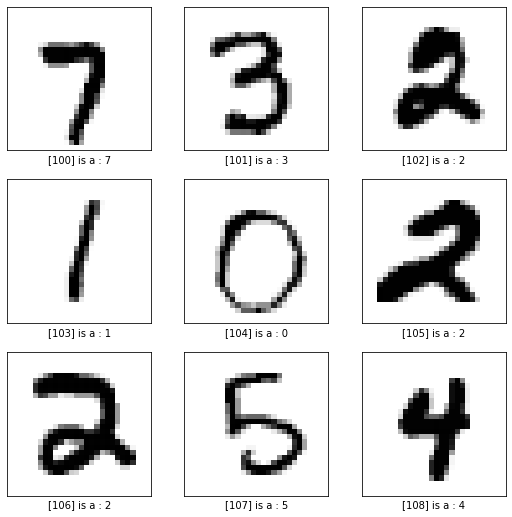

In [10]:
graphit(X_dev_images,Y_dev, 3,3,100,zoom=3)

## Create training data

In [21]:
data_train = data[1000:m].T
Y_train = data_train[0] # labels
X_train = data_train[1:n] # images
X_train = X_train / 255.

print(Y_train.shape,X_train.shape)

(41000,) (784, 41000)


## Building functions for neural network

### Activation functions

In [12]:
def ReLU(Z):
    return np.maximum(0,Z)
    
def deriv_ReLU(Z):
    return Z > 0
    
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

### init the parameters

In [33]:
def init_params(): 
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1)- 0.5
    return W1, b1, W2, b2

### Create the matrix of correct softmax classification

In [14]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

### Forward Propagation

In [24]:
def forward_prop ( W1, b1, W2, b2 , X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

### Back Propagation

In [16]:
def back_prop(Z1, A1, Z2, A2,  W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m *dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m *dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

### Update params

In [17]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1 , W2, b2

### Gradient Descent

In [30]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1 , W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2,  W1, W2, X, Y)
        W1, b1 , W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("interation: ", i)
            print("accuracy: ", get_accuracy(get_predictions(A2),Y))
    return W1, b1, W2, b2

In [31]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [35]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 1000)

interation:  0
[2 4 0 ... 2 2 2] [4 0 9 ... 9 4 3]
accuracy:  0.11060975609756098
interation:  10
[4 1 9 ... 9 4 7] [4 0 9 ... 9 4 3]
accuracy:  0.18707317073170732
interation:  20
[4 0 9 ... 9 4 9] [4 0 9 ... 9 4 3]
accuracy:  0.2878780487804878
interation:  30
[4 0 9 ... 9 4 3] [4 0 9 ... 9 4 3]
accuracy:  0.3710731707317073
interation:  40
[4 0 9 ... 9 4 3] [4 0 9 ... 9 4 3]
accuracy:  0.43502439024390244
interation:  50
[4 0 9 ... 9 4 3] [4 0 9 ... 9 4 3]
accuracy:  0.48121951219512193
interation:  60
[4 0 9 ... 9 4 3] [4 0 9 ... 9 4 3]
accuracy:  0.5198048780487805
interation:  70
[4 0 9 ... 9 4 3] [4 0 9 ... 9 4 3]
accuracy:  0.5537073170731708
interation:  80
[4 0 9 ... 9 4 3] [4 0 9 ... 9 4 3]
accuracy:  0.5836097560975609
interation:  90
[4 0 9 ... 9 4 3] [4 0 9 ... 9 4 3]
accuracy:  0.6070731707317073
interation:  100
[4 0 9 ... 9 4 3] [4 0 9 ... 9 4 3]
accuracy:  0.627390243902439
interation:  110
[4 0 9 ... 9 4 3] [4 0 9 ... 9 4 3]
accuracy:  0.6443170731707317
interation: 

## How good did we do?

In [36]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [4]
Label:  4


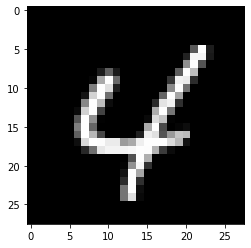

Prediction:  [0]
Label:  0


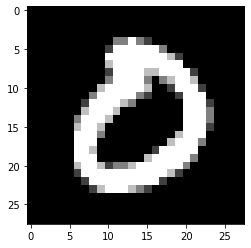

Prediction:  [9]
Label:  9


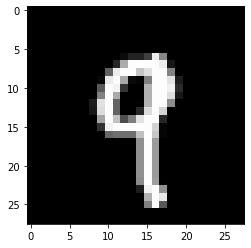

Prediction:  [3]
Label:  3


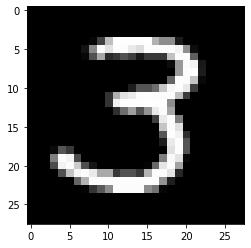

Prediction:  [4]
Label:  4


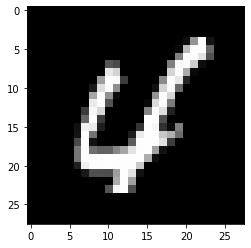

Prediction:  [5]
Label:  5


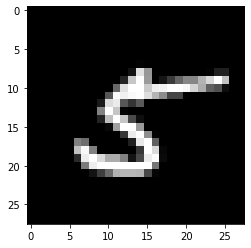

Prediction:  [6]
Label:  6


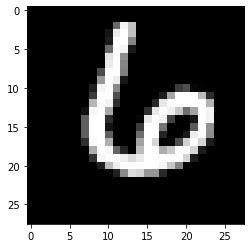

Prediction:  [9]
Label:  9


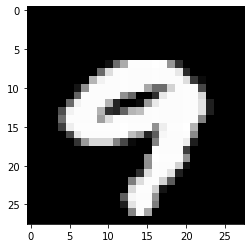

Prediction:  [9]
Label:  7


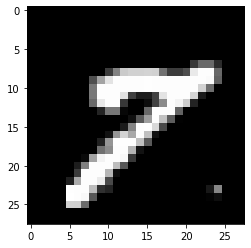

Prediction:  [5]
Label:  3


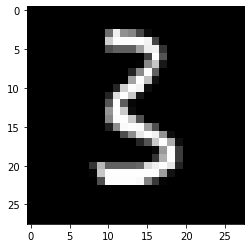

In [38]:
for i in range(10):
    test_prediction(i, W1, b1, W2, b2)
